<a href="https://colab.research.google.com/github/surya323-ma/data-science/blob/main/Predict_Fuel_Efficiency_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()
file_name = next(iter(uploaded))
df=pd.read_csv(file_name) # Changed to read_csv
print(df.columns)
df.head()

Saving auto-mpg.csv to auto-mpg.csv
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
print(df.shape)
df = df[df['horsepower'] != '?']
print(df.shape)

(398, 9)
(392, 9)


In [8]:
df['horsepower'] = df['horsepower'].astype(int)
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [9]:
df.nunique()

,0
mpg,127
cylinders,5
displacement,81
horsepower,93
weight,346
acceleration,95
model year,13
origin,3
car name,301


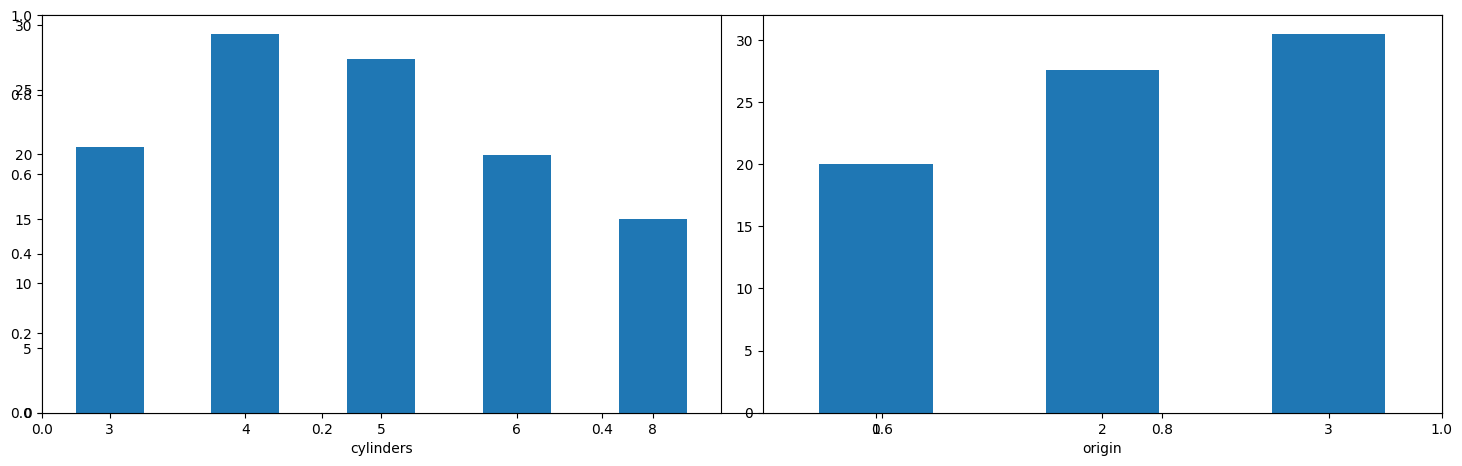

In [10]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

plt.subplots(figsize=(15, 5))
for i, col in enumerate(['cylinders', 'origin']):
    plt.subplot(1, 2, i+1)
    x = numeric_df.groupby(col).mean()['mpg']
    x.plot.bar()
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

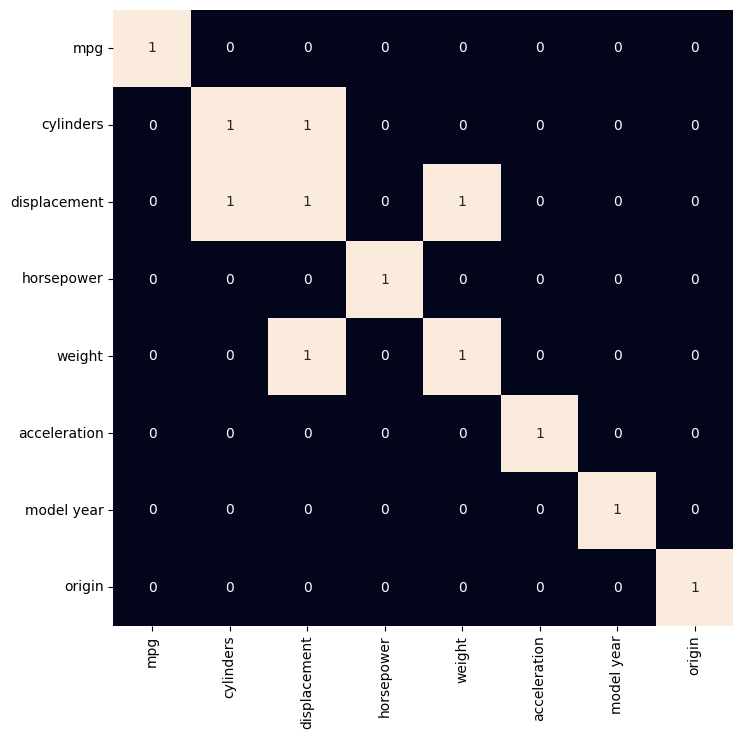

In [11]:
plt.figure(figsize=(8, 8))
sb.heatmap(numeric_df.corr() > 0.9,
		annot=True,
		cbar=False)
plt.show()

In [12]:
df.drop('displacement',
        axis=1,
        inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
features = df.drop(['mpg', 'car name'], axis=1)
target = df['mpg'].values

X_train, X_val, \
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.2,
                                      random_state=22)
X_train.shape, X_val.shape

((313, 6), (79, 6))

In [14]:
AUTO = tf.data.experimental.AUTOTUNE

train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train))
    .batch(32)
    .prefetch(AUTO)
)

val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, Y_val))
    .batch(32)
    .prefetch(AUTO)
)

In [15]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[6]),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='relu')
])

In [16]:
model.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mape']
)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,889 (273.00 KB)

 Trainable params: 68,865 (269.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

In [18]:
history = model.fit(train_ds,
                    epochs=50,
                    validation_data=val_ds)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 22.3674 - mape: 91.0340 - val_loss: 43.8121 - val_mape: 265.1387
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.4767 - mape: 79.1000 - val_loss: 27.5113 - val_mape: 169.1864
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.7326 - mape: 75.6027 - val_loss: 16.2581 - val_mape: 93.1011
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.1946 - mape: 72.9149 - val_loss: 12.2007 - val_mape: 58.4311
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.6097 - mape: 69.9848 - val_loss: 11.2210 - val_mape: 45.7068
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.0540 - mape: 67.0468 - val_loss: 11.2076 - val_mape: 43.7227
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.6332 - mape: 65.0500 - val_loss: 11.7251 - val_mape: 44.7333
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.0937 - mape: 62.7723 - val_loss: 12.2412 - val_mape: 46.6985
Epoch 9/50
10/10 ━━━━

In [19]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,mape,val_loss,val_mape
0,21.725159,86.957458,43.812080,265.138702
1,20.285666,78.436729,27.511284,169.186417
2,19.506104,74.651093,16.258110,93.101059
3,18.969788,71.988747,12.200719,58.431080
4,18.431097,69.508011,11.221037,45.706753


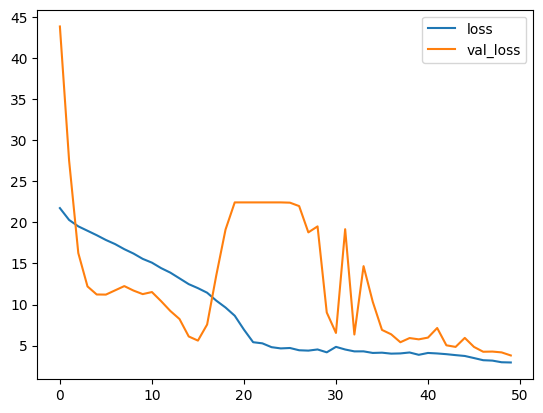

In [20]:
history_df.loc[:, ['loss', 'val_loss']].plot()

plt.show()

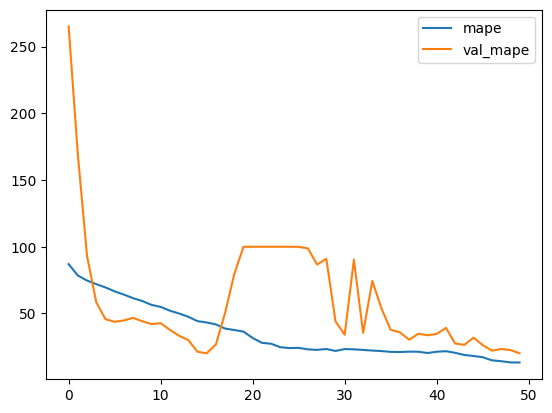

In [21]:
history_df.loc[:, ['mape', 'val_mape']].plot()
plt.show()

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


In [25]:
# Use the uploaded file name instead of the hardcoded path
df = pd.read_csv(file_name)

# Data cleaning and preprocessing steps from previous cells
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(float)
df['origin'] = df['origin'].map({1:'USA', 2:'Europe', 3:'Japan'})
df = pd.get_dummies(df, columns=['origin'], drop_first=True)

# Drop the 'car name' column as it's not a useful feature for modeling
X = df.drop(['mpg', 'car name'], axis=1)
y = df['mpg']

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror')
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        'R2': r2_score(y_test, preds),
        'RMSE': np.sqrt(mean_squared_error(y_test, preds)),
        'MAE': mean_absolute_error(y_test, preds)
    }
pd.DataFrame(results).T


,R2,RMSE,MAE
LinearRegression,0.792277,3.256114,2.462000
RandomForest,0.886111,2.411009,1.717063
GradientBoosting,0.878816,2.487025,1.783788
XGBoost,0.874541,2.530514,1.767452


In [28]:

param_grid = {'n_estimators':[100,200], 'max_depth':[None,10,20]}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_preds = best_model.predict(X_test)
print("Best RF R2:", r2_score(y_test, best_preds))
joblib.dump(best_model, "best_fuel_model.pkl")


Best RF R2: 0.8874125049788999


['best_fuel_model.pkl']

In [29]:
import joblib
import pandas as pd

# Load saved best model
model = joblib.load("best_fuel_model.pkl")

# Example: predict mpg for new car data
new_data = pd.DataFrame({
    "cylinders":[4],
    "displacement":[140.0],
    "horsepower":[90.0],
    "weight":[2264.0],
    "acceleration":[15.5],
    "model year":[82],
    "origin_Europe":[0],
    "origin_Japan":[1]
})

pred = model.predict(new_data)
print("Predicted MPG:", pred[0])


Predicted MPG: 17.542999999999996
